Caitlin Lindsay Chosen Dataset: Abalone (https://archive.ics.uci.edu/dataset/1/abalone)
    <br>Instruction: Perform regression analysis on your chosen dataset

In [66]:
!pip install ucimlrepo
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

import seaborn as sns
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import r2_score

In [59]:
#Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets 
  
# metadata 
#print(abalone.metadata) 
print("\n")  
# variable information 
print(abalone.metadata) 
#print(abalone.variables) 
print(X)
print(y.Rings)



{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -

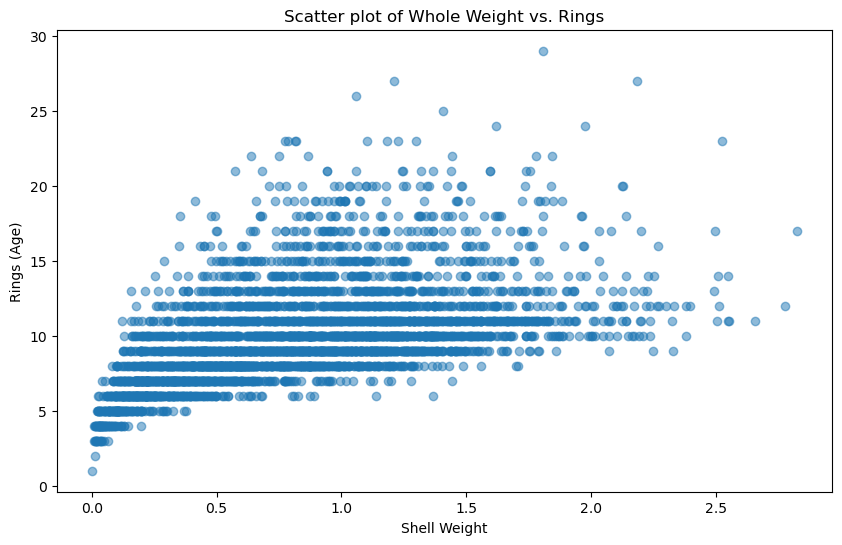

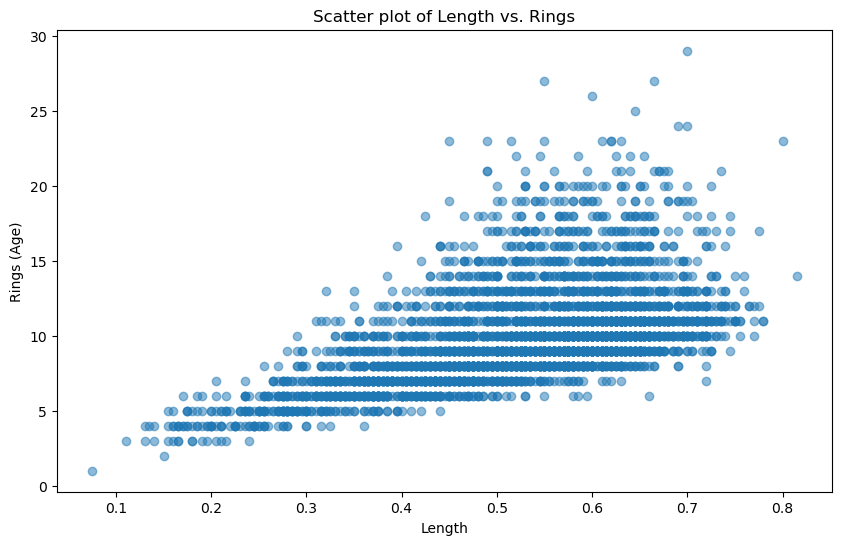

In [60]:
'''import plotly.express as px

# Scatter plot between Length and Shucked_weight with Rings in y
scatter_fig_shucked = px.scatter(x=X['Length'], y=X['Whole_weight'], color=y['Rings'], 
                                 title='Relationship between Length and Shucked Weight (Colored by Rings)',
                                 labels={'x': 'Length', 'y': 'Shucked Weight', 'color': 'Rings'})
scatter_fig_shucked.update_layout(xaxis_title='Length', yaxis_title='Shucked Weight')
scatter_fig_shucked.show()'''

plt.figure(figsize=(10, 6))
plt.scatter(X['Whole_weight'], y.Rings, alpha=0.5)
plt.title('Scatter plot of Whole Weight vs. Rings')
plt.xlabel('Shell Weight')
plt.ylabel('Rings (Age)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X['Length'], y.Rings, alpha=0.5)
plt.title('Scatter plot of Length vs. Rings')
plt.xlabel('Length')
plt.ylabel('Rings (Age)')
plt.show()


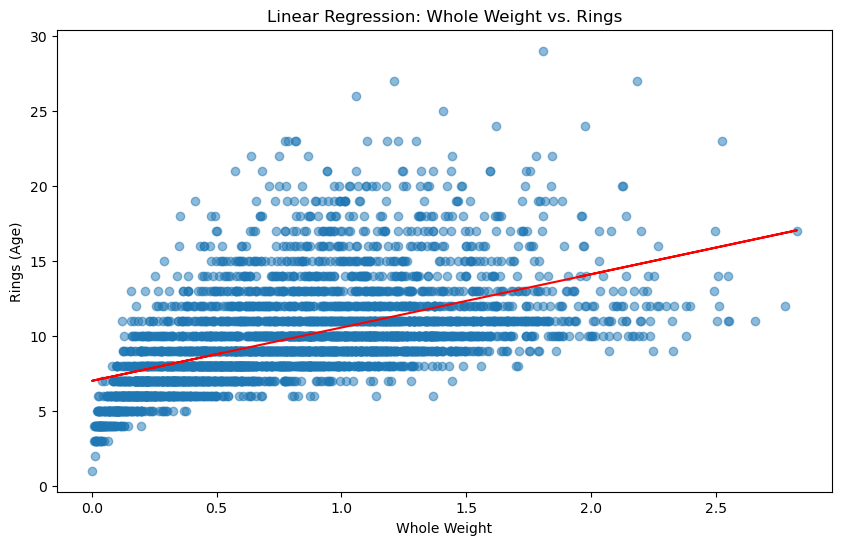

In [62]:
'''# Reshape data for modeling
X = np.array(X['Whole_weight']).reshape(-1, 1)
y = np.array(y.Rings)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the results along with the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)  # Actual data
plt.plot(X, y_pred, color='red')  # Predicted regression line
plt.title('Linear Regression: Whole Weight vs. Rings')
plt.xlabel('Whole Weight')
plt.ylabel('Rings (Age)')
plt.show()'''

X_model = np.array(X['Whole_weight']).reshape(-1, 1)  # Use 'Whole weight' with the correct spelling
y_model = np.array(y.Rings)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_model, y_model)

# Predict values
y_pred_model = model.predict(X_model)

# Plot the results along with the data
plt.figure(figsize=(10, 6))
plt.scatter(X_model, y_model, alpha=0.5)  # Actual data
plt.plot(X_model, y_pred_model, color='red')  # Predicted regression line
plt.title('Linear Regression: Whole Weight vs. Rings')
plt.xlabel('Whole Weight')
plt.ylabel('Rings (Age)')
plt.show()

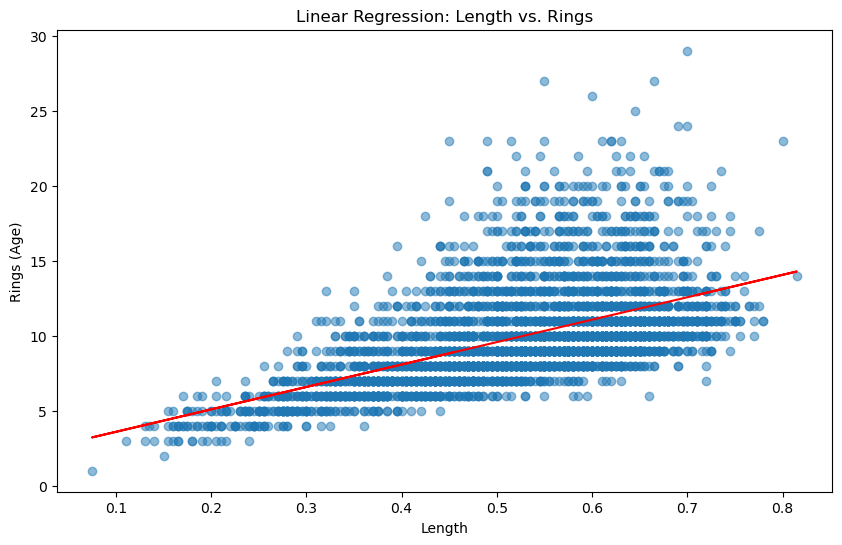

In [64]:
X_length_model = np.array(X['Length']).reshape(-1, 1)  # Use 'Length' with the correct spelling
y_length_model = np.array(y.Rings)


model_length = LinearRegression()


model_length.fit(X_length_model, y_length_model)

y_pred_length = model_length.predict(X_length_model)

plt.figure(figsize=(10, 6))
plt.scatter(X_length_model, y_length_model, alpha=0.5)  # Actual data
plt.plot(X_length_model, y_pred_length, color='red')  # Predicted regression line
plt.title('Linear Regression: Length vs. Rings')
plt.xlabel('Length')
plt.ylabel('Rings (Age)')
plt.show()

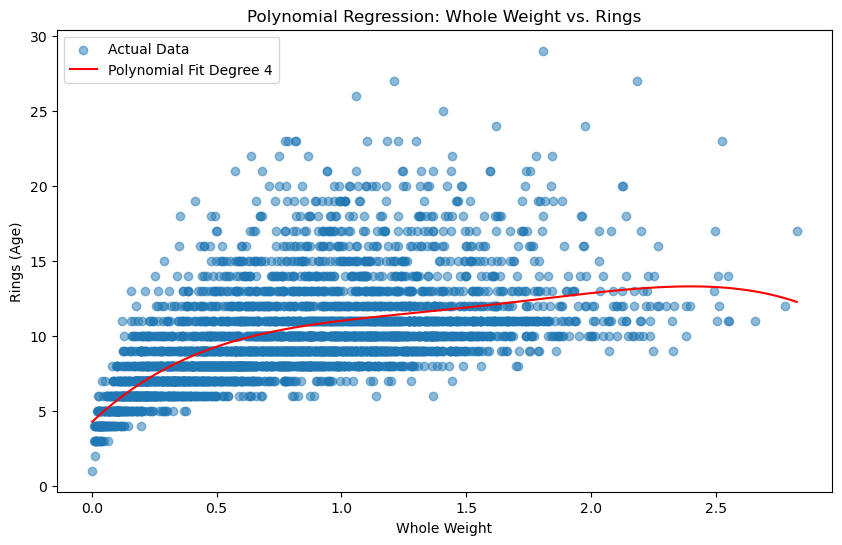

R-squared for Polynomial Degree 4: 0.345


In [77]:
# Polynomial 

X_whole_weight = np.array(X['Whole_weight']).reshape(-1, 1)  # 'Whole_weight' column as a 1D array
y_rings = np.array(y.Rings)


coefficients = np.polyfit(X_whole_weight.flatten(), y_rings, 4)
poly_func = np.poly1d(coefficients)


x_poly = np.linspace(X_whole_weight.min(), X_whole_weight.max(), 100)
y_poly = poly_func(x_poly)


plt.figure(figsize=(10, 6))
plt.scatter(X_whole_weight, y_rings, alpha=0.5, label='Actual Data')
plt.plot(x_poly, y_poly, color='red', label='Polynomial Fit Degree 4')
plt.title('Polynomial Regression: Whole Weight vs. Rings')
plt.xlabel('Whole Weight')
plt.ylabel('Rings (Age)')
plt.legend()
plt.show()


y_pred_poly = poly_func(X_whole_weight.flatten())
r_squared = r2_score(y_rings, y_pred_poly)
print("R-squared for Polynomial Degree 4: {:.3f}".format(r_squared))

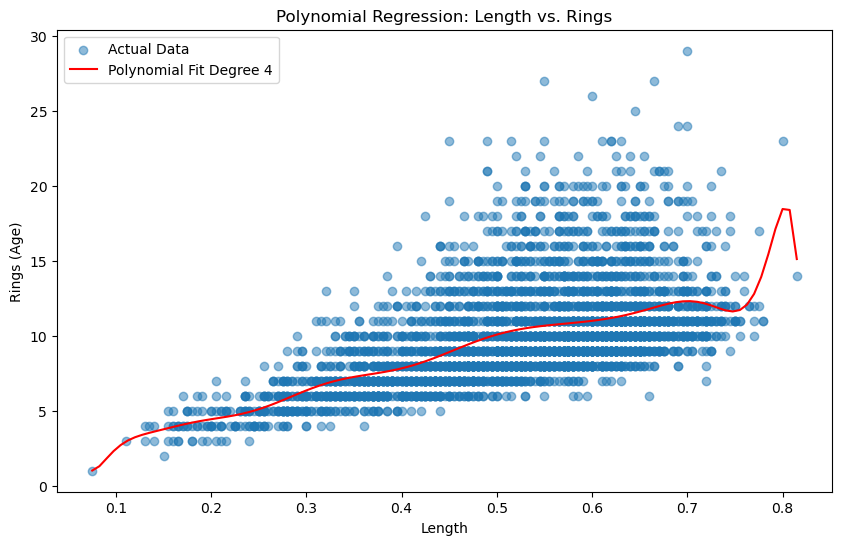

R-squared for Polynomial Degree 15: 0.322


In [83]:
coefficients_length = np.polyfit(X['Length'], y.Rings, 15)
poly_func_length = np.poly1d(coefficients_length)


x_poly_length = np.linspace(X['Length'].min(), X['Length'].max(), 100)
y_poly_length = poly_func_length(x_poly_length)


plt.figure(figsize=(10, 6))
plt.scatter(X['Length'], y.Rings, alpha=0.5, label='Actual Data')
plt.plot(x_poly_length, y_poly_length, color='red', label='Polynomial Fit Degree 4')
plt.title('Polynomial Regression: Length vs. Rings')
plt.xlabel('Length')
plt.ylabel('Rings (Age)')
plt.legend()
plt.show()


y_pred_poly_length = poly_func_length(X['Length'])
r_squared_length = r2_score(y.Rings, y_pred_poly_length)
print("R-squared for Polynomial Degree 15: {:.3f}".format(r_squared_length))


In [87]:
import plotly.express as px


df_plot = X.copy()
df_plot['Rings'] = y.Rings


fig = px.scatter(df_plot, x='Whole_weight', y='Length', color='Rings',
                 labels={'Whole_weight': 'Whole Weight', 'Length': 'Length', 'Rings': 'Rings (Age)'},
                 title='Scatter Plot of Length vs. Whole Weight Colored by Rings')
fig.show()


In [86]:
from sklearn.linear_model import LinearRegression

# Prepare data for multivariate regression
X_multivariate = X[['Length', 'Whole_weight']]
y_multivariate = y.Rings

# Create and fit the model
model_multivariate = LinearRegression()
model_multivariate.fit(X_multivariate, y_multivariate)

# Predict values and evaluate the model
y_pred_multivariate = model_multivariate.predict(X_multivariate)
r_squared_multivariate = r2_score(y_multivariate, y_pred_multivariate)
print("R-squared for multivariate linear regression: {:.3f}".format(r_squared_multivariate))


R-squared for multivariate linear regression: 0.314


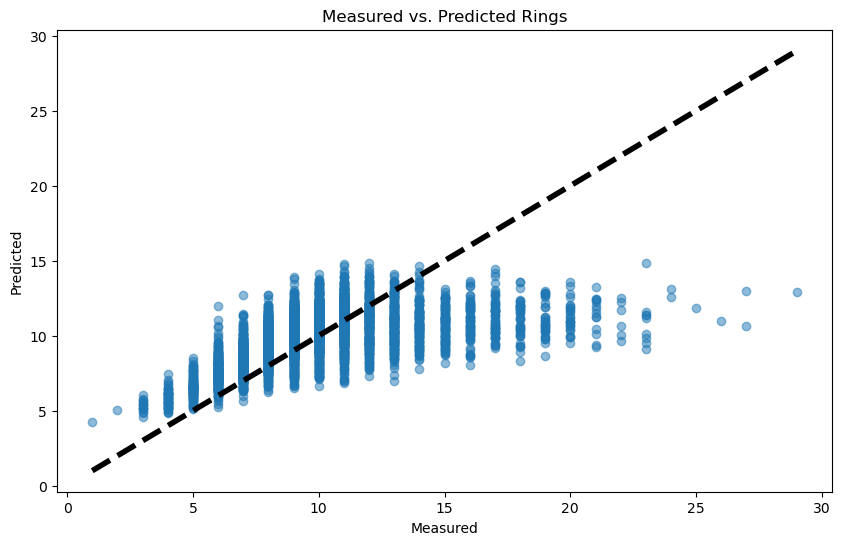

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_multivariate, y_pred_multivariate, alpha=0.5)
plt.plot([y_multivariate.min(), y_multivariate.max()], [y_multivariate.min(), y_multivariate.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Rings')
plt.show()
